<a href="https://colab.research.google.com/github/Angelaruiga/python_/blob/main/Predicci%C3%B3n_Turista_Caso_Pr%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte 1: Carga de Datos

Para empezar, cargué los datos históricos de turistas en un DataFrame de Pandas. Aquí tienes cómo hacerlo:

In [13]:
import pandas as pd

# Datos históricos
data = {
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Tourists": [83.5, 18.9, 31.2, 71.7, 85.1]  # Millones de turistas
}

# Crear DataFrame
df = pd.DataFrame(data)
print(df)


   Year  Tourists
0  2019      83.5
1  2020      18.9
2  2021      31.2
3  2022      71.7
4  2023      85.1


Parte 2:

A. Aplicación de la Regresión Lineal

Después de preparar los datos, utilicé la regresión lineal para predecir el número de turistas para el año 2024.

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos para el modelo
X = df['Year'].values.reshape(-1, 1)
y = df['Tourists'].values

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Predecir para 2024
year_2024 = np.array([[2024]])
predicted_tourists_2024_lineal = model.predict(year_2024)
print(predicted_tourists_2024_lineal)


[74.88]


B. Suavizamiento Exponencial

También utilicé el suavizamiento exponencial para predecir el número de turistas, que pondera más los valores más recientes.

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

alpha = 0.5
df['Smoothed'] = df['Tourists'].ewm(alpha=0.5, adjust=False).mean()
predicted_tourists_exp_smooth = alpha * df['Tourists'].iloc[-1] + (1 - alpha) * df['Smoothed'].iloc[-1]

print(predicted_tourists_exp_smooth)


77.9375


C.Media Móvil

Para suavizar las fluctuaciones de los datos, utilicé la media móvil de los últimos tres años.

In [20]:
# Calcular la media móvil de los últimos 3 años
predicted_tourists_moving_avg = round(df['Tourists'].rolling(window=3).mean().iloc[-1], 1)
print(predicted_tourists_moving_avg)



62.7


D.Combinación de Predicciones

Finalmente, combiné las predicciones de los tres métodos para obtener un valor promedio que integre las distintas perspectivas.

In [33]:

# Combinación de las predicciones de los tres métodos
pred_combined = (predicted_tourists_2024_lineal + predicted_tourists_exp_smooth + predicted_tourists_moving_avg) / 3
print(pred_combined)

[71.83916667]


Parte.3 Visualización de Resultados

Visualizar los resultados siempre es crucial para entender mejor los datos y comunicar los hallazgos.

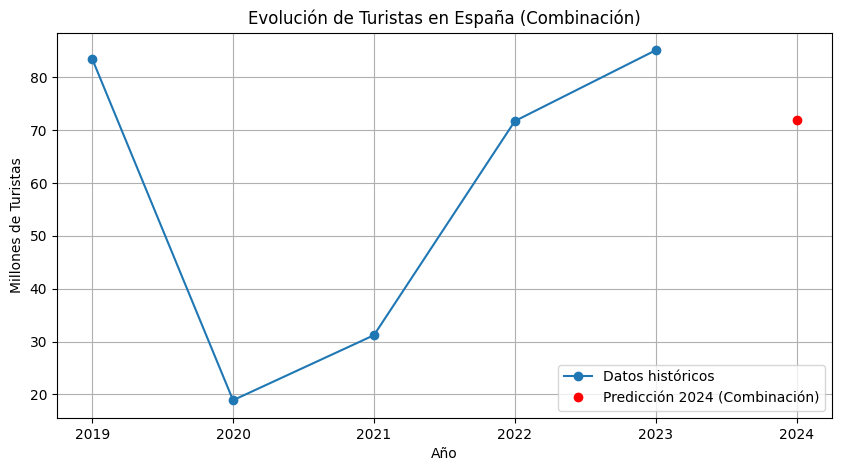

In [18]:
# Crear una lista extendida de años y turistas para incluir la predicción
years_extended = df['Year'].tolist() + [2024]
tourists_extended = df['Tourists'].tolist() + [pred_combined[0]]

# Generar el gráfico
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Tourists'], marker='o', linestyle='-', label='Datos históricos')
plt.plot(2024, pred_combined, 'ro', label='Predicción 2024 (Combinación)')
plt.title('Evolución de Turistas en España (Combinación)')
plt.xlabel('Año')
plt.ylabel('Millones de Turistas')
plt.legend()
plt.grid(True)
plt.xticks(years_extended)
plt.show()
